In [1]:
#Libraries

from astropy.io import fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Configurations of program

Covariance_Test1 = True       #True for realice the covariance test, false for don't make it // Covariance of the data from the first folder
Covariance_Test2 = True       #True for realice the covariance test, false for don't make it // Covariance of the data from the second folder
Covariance_Test3 = True       #True for realice the covariance test, false for don't make it // Covariance of the data from the third folder

Covariance_Testc1 = True       #True for realice the covariance test of three multipoles, false for don't make it // Covariance of the data from the first folder
Covariance_Testc2 = True       #True for realice the covariance test of three multipoles, false for don't make it // Covariance of the data from the second folder
Covariance_Testc3 = True       #True for realice the covariance test of three multipoles, false for don't make it // Covariance of the data from the third folder

Plots1 = True                 #True for make the graphics, false for don't make it // Plot from the first folder
Plots2 = True                 #True for make the graphics, false for don't make it // Plot from the second folder
Plots3 = True                 #True for make the graphics, false for don't make it // Plot from the tird folder

Plots_3M1 = True              #True for make the graphics, false for don't make it // Plot from the three multipole in the first folder
Plots_3M2 = True              #True for make the graphics, false for don't make it // Plot from the three multipole in the second folder
Plots_3M3 = True              #True for make the graphics, false for don't make it // Plot from the three multipole in the third folder

In [3]:
#Configurations for the measures

Nbins=200                    #Number of data 200
Nsimulations=100             #Number of simulations, for more measures more precision, 10000 is the optimum
measures1=[]                 #Data vector, created for copy the elements of the table in file 1
measures2=[]                 #Data vector, created for copy the elements of the table in file 2
measures3=[]                 #Data vector, created for copy the elements of the table in file 3

measuresc11=[]                #Data vector, created for three multipoles in file 1 with sigma 0
measuresc12=[]                #Data vector, created for three multipoles in file 1 with sigma 2
measuresc13=[]                #Data vector, created for three multipoles in file 1 with sigma 4

measuresc21=[]                #Data vector, created for three multipoles in file 2 with sigma 0
measuresc22=[]                #Data vector, created for three multipoles in file 2 with sigma 2
measuresc23=[]                #Data vector, created for three multipoles in file 2 with sigma 4

measuresc31=[]                #Data vector, created for three multipoles in file 3 with sigma 0
measuresc32=[]                #Data vector, created for three multipoles in file 3 with sigma 2
measuresc33=[]                #Data vector, created for three multipoles in file 3 with sigma 4

test1 = 1
sigma1 = [0.02, 0.02, 0.02]           #Sigma is defined for each data set 1
ls1 = [25, 50, 75]

test2 = 2
sigma2 = [0.02, 0.01, 0.005]           #Sigma is defined for each data set 2
ls2 = [50, 50, 50]

test3 = 3
sigma3 = [0.02, 0.01, 0.005]           #Sigma is defined for each data set 3
ls3 = [5, 5, 5]


#Definitions to build the covarince matrices based on Squared Exponential kernel

def covautocoor(x1, x2, sigma, ls):
    return sigma**2.*np.exp(-(x1 - x2)**2./(2.*ls**2.))

def covcoor(x1, x2, sigmap, lsp, sigmas, lss):
    return sigmap*sigmas*(np.sqrt(2.*lsp*lss/(lsp**2. + lss**2.))*np.exp(-(x1 - x2)**2./(lsp**2. + lss**2.)))

In [4]:
#Read data for single multipole in the file 1

for i in np.arange(Nsimulations)+1:
    file_name1 = f'/Users/marco/Escritorio/Sherlock/Clases_Units/Abilita_Informatica/data/MockMeasures_2PCF_Test{test1}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test1}_{i}.fits'
    
    file1 = fits.open(file_name1)
    table = file1[1].data.copy()
    measures1.append(table['XI0'])       #For XI0, XI2 and XI3 we use sigma 0, sigma 2, sigma 4 respectively
    
    if i==1:
        scale1 = table['SCALE']
        
    del table
    file1.close()
    
measures1=np.asarray(measures1).transpose()
    

#Read data for single multipole in the file 2
    
for i in np.arange(Nsimulations)+1:
    file_name2 = f'/Users/marco/Escritorio/Sherlock/Clases_Units/Abilita_Informatica/data/MockMeasures_2PCF_Test{test2}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test2}_{i}.fits'
    
    file2 = fits.open(file_name2)
    table = file2[1].data.copy()
    measures2.append(table['XI0'])       #For XI0, XI2 and XI3 we use sigma 0, sigma 2, sigma 4 respectively
    
    if i==1:
        scale2 = table['SCALE']
        
    del table
    file2.close()
    
measures2=np.asarray(measures2).transpose()
    

#Read data for single multipole in the file 3
    
for i in np.arange(Nsimulations)+1:
    file_name3 = f'/Users/marco/Escritorio/Sherlock/Clases_Units/Abilita_Informatica/data/MockMeasures_2PCF_Test{test3}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test3}_{i}.fits'
    
    file3 = fits.open(file_name3)
    table = file3[1].data.copy()
    measures3.append(table['XI0'])      #For XI0, XI2 and XI3 we use sigma 0, sigma 2, sigma 4 respectively
    
    if i==1:
        scale3 = table['SCALE']
        
    del table
    file3.close()
    
measures3=np.asarray(measures3).transpose()

In [5]:
#Calculation with numpy tool

cov_xi1 = np.cov(measures1)                     #Numpy covariance 1
cov_xi2 = np.cov(measures2)                     #Numpy covariance 2
cov_xi3 = np.cov(measures3)                     #Numpy covariance 3

In [6]:
#Covariance Test for data set 1

if Covariance_Test1:                    #It can be turned on or off with the "True" and "False" commands at the top
    
    Average1 = np.zeros((Nbins,),dtype=float)
    Covariance1 = np.zeros((Nbins,Nbins),dtype=float)

    for i in range(Nsimulations):
        Average1 += measures1[:,i]
    
    Average1 /= Nsimulations

    for i in range(Nbins):
        for j in range(Nbins):
            Covariance1[i,j] = 1/(Nsimulations-1)*(np.sum((measures1[i] - Average1[i])*(measures1[j] - Average1[j])))
    

#Covariance Test for data set 2
    
if Covariance_Test2:                    #It can be turned on or off with the "True" and "False" commands at the top
    
    Average2 = np.zeros((Nbins,),dtype=float)
    Covariance2 = np.zeros((Nbins,Nbins),dtype=float)

    for i in range(Nsimulations):
        Average2 += measures2[:,i]
    
    Average2 /= Nsimulations

    for i in range(Nbins):
        for j in range(Nbins):
            Covariance2[i,j] = 1/(Nsimulations-1)*(np.sum((measures2[i] - Average2[i])*(measures2[j] - Average2[j])))
    

#Covariance Test for data set 3

if Covariance_Test3:                    #It can be turned on or off with the "True" and "False" commands at the top
    
    Average3 = np.zeros((Nbins,),dtype=float)
    Covariance3 = np.zeros((Nbins,Nbins),dtype=float)

    for i in range(Nsimulations):
        Average3 += measures3[:,i]
    
    Average3 /= Nsimulations

    for i in range(Nbins):
        for j in range(Nbins):
            Covariance3[i,j] = 1/(Nsimulations-1)*(np.sum((measures3[i] - Average3[i])*(measures3[j] - Average3[j])))
            

print('This test is used to know if the calculation is on the right way')
print('****************************************************************')
print('Largest deviation between numerical method and numpy tool for the data set 1: {}'.format(np.max(np.abs(Covariance1-cov_xi1))))
print('')
print('Largest deviation between numerical method and numpy tool for the data set 2: {}'.format(np.max(np.abs(Covariance2-cov_xi2))))
print('')
print('Largest deviation between numerical method and numpy tool for the data set 3: {}'.format(np.max(np.abs(Covariance3-cov_xi3))))

This test is used to know if the calculation is on the right way
****************************************************************
Largest deviation between numerical method and numpy tool for the data set 1: 3.7947076036992655e-19

Largest deviation between numerical method and numpy tool for the data set 2: 4.336808689942018e-19

Largest deviation between numerical method and numpy tool for the data set 3: 3.7947076036992655e-19


In [7]:
#Theoretical covariance for the data set 1

cov_th1 = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th1[i,j] = covautocoor(scale1[i],scale1[j],sigma1[0],ls1[0])
        

#Theoretical covariance for the data set 2

cov_th2 = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th2[i,j] = covautocoor(scale2[i],scale2[j],sigma2[0],ls2[0])
        

#Theoretical covariance for the data set 3

cov_th3 = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3[i,j] = covautocoor(scale3[i],scale3[j],sigma3[0],ls3[0])

In [8]:
#Normalized residual for data set 1

normalized_residuals1 = np.zeros_like(cov_th1)
for i in range(Nbins):
    for j in range(Nbins):
        R1 = cov_th1[i,j]/np.sqrt(cov_th1[i,i]*cov_th1[j,j])
        normalized_residuals1[i,j]=(cov_th1[i,j]-cov_xi1[i,j])*np.sqrt((Nsimulations-1.)/((1.+R1)*cov_th1[i,i]*cov_th1[j,j]))

Standar_deviation1=np.std(normalized_residuals1.reshape(Nbins**2))
    
    
#Normalized residual for data set 2
    
normalized_residuals2 = np.zeros_like(cov_th2)
for i in range(Nbins):
    for j in range(Nbins):
        R2 = cov_th2[i,j]/np.sqrt(cov_th2[i,i]*cov_th2[j,j])
        normalized_residuals2[i,j]=(cov_th2[i,j]-cov_xi2[i,j])*np.sqrt((Nsimulations-1.)/((1.+R2)*cov_th2[i,i]*cov_th2[j,j]))

Standar_deviation2=np.std(normalized_residuals2.reshape(Nbins**2))
    
    
#Normalized residual for data set 3
    
normalized_residuals3 = np.zeros_like(cov_th3)
for i in range(Nbins):
    for j in range(Nbins):
        R3 = cov_th3[i,j]/np.sqrt(cov_th3[i,i]*cov_th3[j,j])
        normalized_residuals3[i,j]=(cov_th3[i,j]-cov_xi3[i,j])*np.sqrt((Nsimulations-1.)/((1.+R3)*cov_th3[i,i]*cov_th3[j,j]))

Standar_deviation3=np.std(normalized_residuals3.reshape(Nbins**2))


print(f"Standard deviation of normalized residuals of data set 1: {Standar_deviation1}")
if Standar_deviation1<1.:
    print("Validated")
else:
    print("No Validated")
    
print('')
print('')
print(f"Standard deviation of normalized residuals of data set 2: {Standar_deviation2}")
if Standar_deviation2<1.:
    print("Validated")
else:
    print("No Validated")

print('')
print('')
print(f"Standard deviation of normalized residuals of data set 3: {Standar_deviation3}")
if Standar_deviation3<1.:
    print("Validated")
else:
    print("No Validated")

Standard deviation of normalized residuals of data set 1: 0.6238158567581635
Validated


Standard deviation of normalized residuals of data set 2: 0.7342658420479818
Validated


Standard deviation of normalized residuals of data set 3: 0.9252462114569949
Validated


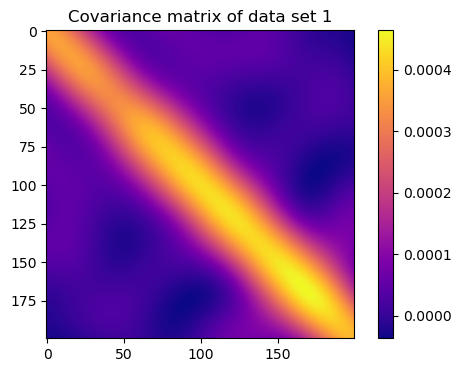

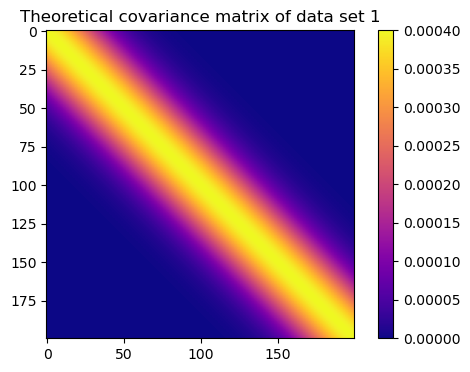

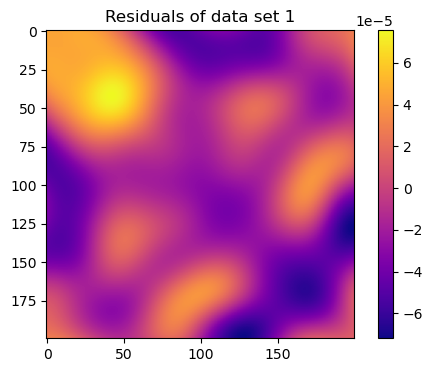

In [9]:
if Plots1:

    # Matrix plot of measured covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Covariance matrix of data set 1')
    plt.imshow(cov_xi1, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Theoretical covariance matrix of data set 1')
    plt.imshow(cov_th1, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Residuals of data set 1')
    plt.imshow(cov_th1-cov_xi1, cmap="plasma")
    cbar = plt.colorbar()
    plt.show()

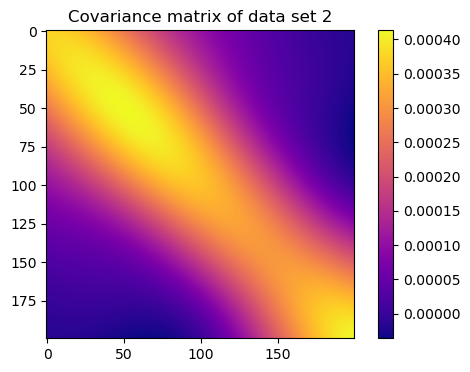

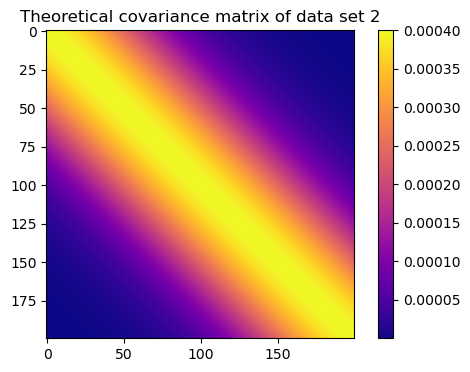

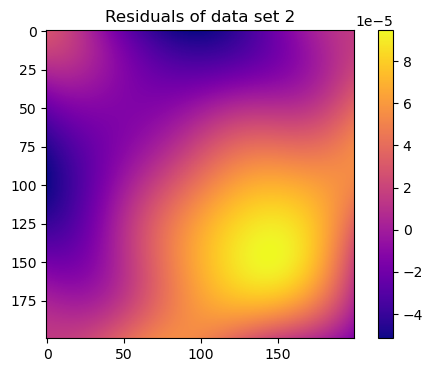

In [10]:
if Plots2:

    # Matrix plot of measured covariance matrix of data set 2
    fig = plt.figure(figsize=(6,4))
    plt.title('Covariance matrix of data set 2')
    plt.imshow(cov_xi2, cmap="plasma")
    cbar = plt.colorbar()


    # Matrix plot of theoretical covariance matrix of data set 2
    fig = plt.figure(figsize=(6,4))
    plt.title('Theoretical covariance matrix of data set 2')
    plt.imshow(cov_th2, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 2
    fig = plt.figure(figsize=(6,4))
    plt.title('Residuals of data set 2')
    plt.imshow(cov_th2-cov_xi2, cmap="plasma")
    cbar = plt.colorbar()
    plt.show()

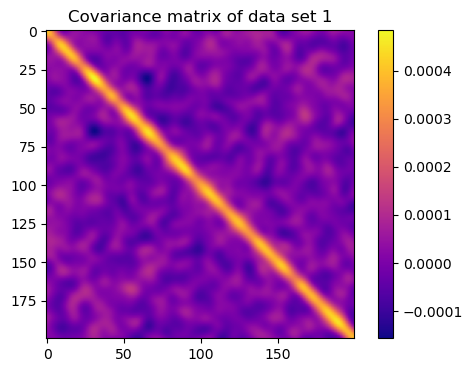

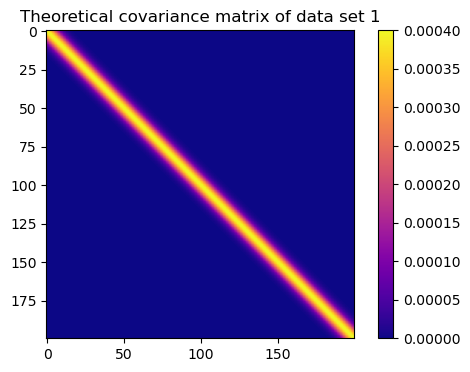

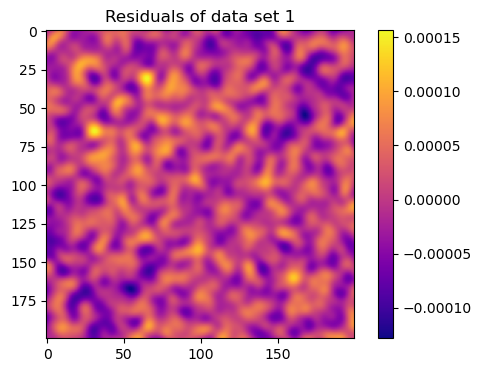

In [11]:
if Plots3:

    # Matrix plot of measured covariance matrix of data set 3
    fig = plt.figure(figsize=(6,4))
    plt.title('Covariance matrix of data set 1')
    plt.imshow(cov_xi3, cmap="plasma")
    cbar = plt.colorbar()


    # Matrix plot of theoretical covariance matrix of data set 3
    fig = plt.figure(figsize=(6,4))
    plt.title('Theoretical covariance matrix of data set 1')
    plt.imshow(cov_th3, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 3
    fig = plt.figure(figsize=(6,4))
    plt.title('Residuals of data set 1')
    plt.imshow(cov_th3-cov_xi3, cmap="plasma")
    cbar = plt.colorbar()
    plt.show()

In [12]:
#Read data for three multipole in the file 1

for i in np.arange(Nsimulations)+1:
    file_namec1 = f'/Users/marco/Escritorio/Sherlock/Clases_Units/Abilita_Informatica/data/MockMeasures_2PCF_Test{test1}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test1}_{i}.fits'
    
    filec1 = fits.open(file_namec1)
    table = filec1[1].data.copy()
    measuresc11.append(table['XI0'])       #For XI0 we use sigma 0
    measuresc12.append(table['XI2'])       #For XI2 we use sigma 2
    measuresc13.append(table['XI4'])       #For XI3 we use sigma 4
    
    if i==1:
        scalec1 = table['SCALE']
        
    del table
    filec1.close()
    
measuresc11=np.asarray(measuresc11).transpose()
measuresc12=np.asarray(measuresc12).transpose()
measuresc13=np.asarray(measuresc13).transpose()

concatenatev1 = []
concatenatev1 = np.array(concatenatev1)
concatenatev1 = np.concatenate((measuresc11,measuresc12,measuresc13),axis=0)


#Read data for three multipole in the file 2

for i in np.arange(Nsimulations)+1:
    file_namec2 = f'/Users/marco/Escritorio/Sherlock/Clases_Units/Abilita_Informatica/data/MockMeasures_2PCF_Test{test2}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test2}_{i}.fits'
    
    filec2 = fits.open(file_namec2)
    table = filec2[1].data.copy()
    measuresc21.append(table['XI0'])       #For XI0 we use sigma 0
    measuresc22.append(table['XI2'])       #For XI2 we use sigma 2
    measuresc23.append(table['XI4'])       #For XI3 we use sigma 4
    
    if i==1:
        scalec2 = table['SCALE']
        
    del table
    filec2.close()
    
measuresc21=np.asarray(measuresc21).transpose()
measuresc22=np.asarray(measuresc22).transpose()
measuresc23=np.asarray(measuresc23).transpose()

concatenatev2 = []
concatenatev2 = np.array(concatenatev2)
concatenatev2 = np.concatenate((measuresc21,measuresc22,measuresc23),axis=0)


#Read data for three multipole in the file 3

for i in np.arange(Nsimulations)+1:
    file_namec3 = f'/Users/marco/Escritorio/Sherlock/Clases_Units/Abilita_Informatica/data/MockMeasures_2PCF_Test{test3}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test3}_{i}.fits'
    
    filec3 = fits.open(file_namec3)
    table = filec3[1].data.copy()
    measuresc31.append(table['XI0'])       #For XI0 we use sigma 0
    measuresc32.append(table['XI2'])       #For XI2 we use sigma 2
    measuresc33.append(table['XI4'])       #For XI3 we use sigma 4
    
    if i==1:
        scalec3 = table['SCALE']
        
    del table
    filec3.close()
    
measuresc31=np.asarray(measuresc31).transpose()
measuresc32=np.asarray(measuresc32).transpose()
measuresc33=np.asarray(measuresc33).transpose()

concatenatev3 = []
concatenatev3 = np.array(concatenatev3)
concatenatev3 = np.concatenate((measuresc31,measuresc32,measuresc33),axis=0)

In [13]:
#Calculation with numpy tool

cov_xic1 = np.cov(concatenatev1)                     #Numpy covariance 1
cov_xic2 = np.cov(concatenatev2)                     #Numpy covariance 2
cov_xic3 = np.cov(concatenatev3)                     #Numpy covariance 3

In [14]:
#Covariance Test for data set 1

if Covariance_Testc1:                    #It can be turned on or off with the "True" and "False" commands at the top
    
    Averagec1 = np.zeros((3*Nbins,),dtype=float)
    Covariancec1 = np.zeros((3*Nbins,3*Nbins),dtype=float)

    for i in range(Nsimulations):
        Averagec1 += concatenatev1[:,i]
    
    Averagec1 /= Nsimulations

    for i in range(3*Nbins):
        for j in range(3*Nbins):
            Covariancec1[i,j] = 1/(Nsimulations-1)*(np.sum((concatenatev1[i] - Averagec1[i])*(concatenatev1[j] - Averagec1[j])))
    

#Covariance Test for data set 2
    
if Covariance_Testc2:                    #It can be turned on or off with the "True" and "False" commands at the top
    
    Averagec2 = np.zeros((3*Nbins,),dtype=float)
    Covariancec2 = np.zeros((3*Nbins,3*Nbins),dtype=float)

    for i in range(Nsimulations):
        Averagec2 += concatenatev2[:,i]
    
    Averagec2 /= Nsimulations

    for i in range(3*Nbins):
        for j in range(3*Nbins):
            Covariancec2[i,j] = 1/(Nsimulations-1)*(np.sum((concatenatev2[i] - Averagec2[i])*(concatenatev2[j] - Averagec2[j])))
    

#Covariance Test for data set 3

if Covariance_Testc3:                    #It can be turned on or off with the "True" and "False" commands at the top
    
    Averagec3 = np.zeros((3*Nbins,),dtype=float)
    Covariancec3 = np.zeros((3*Nbins,3*Nbins),dtype=float)

    for i in range(Nsimulations):
        Averagec3 += concatenatev3[:,i]
    
    Averagec3 /= Nsimulations

    for i in range(3*Nbins):
        for j in range(3*Nbins):
            Covariancec3[i,j] = 1/(Nsimulations-1)*(np.sum((concatenatev3[i] - Averagec3[i])*(concatenatev3[j] - Averagec3[j])))
            

print('This test is used to know if the calculation is on the right way')
print('****************************************************************')
print('Largest deviation between numerical method and numpy tool for the data set 1 of three multipoles: {}'.format(np.max(np.abs(Covariancec1-cov_xic1))))
print('')
print('Largest deviation between numerical method and numpy tool for the data set 2 of three multipoles: {}'.format(np.max(np.abs(Covariancec2-cov_xic2))))
print('')
print('Largest deviation between numerical method and numpy tool for the data set 3 of three multipoles: {}'.format(np.max(np.abs(Covariancec3-cov_xic3))))

This test is used to know if the calculation is on the right way
****************************************************************
Largest deviation between numerical method and numpy tool for the data set 1 of three multipoles: 4.336808689942018e-19

Largest deviation between numerical method and numpy tool for the data set 2 of three multipoles: 4.336808689942018e-19

Largest deviation between numerical method and numpy tool for the data set 3 of three multipoles: 3.7947076036992655e-19


In [15]:
#Theoretical covariance for the data set 1 of three multipoles, autocorrelation

cov_th3ms0_1 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms0_1[i,j] = covautocoor(scalec1[i],scalec1[j],sigma1[0],ls1[0])

cov_th3ms2_1 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 2
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms2_1[i,j] = covautocoor(scalec1[i],scalec1[j],sigma1[1],ls1[1])
        
cov_th3ms4_1 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms4_1[i,j] = covautocoor(scalec1[i],scalec1[j],sigma1[2],ls1[2])
        

#Theoretical covariance for the data set 2 of three multipoles, autocorrelation

cov_th3ms0_2 = np.zeros((Nbins,Nbins),dtype=float)                         #For sigma 0
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms0_2[i,j] = covautocoor(scalec2[i],scalec2[j],sigma2[0],ls2[0])
        
cov_th3ms2_2 = np.zeros((Nbins,Nbins),dtype=float)                         #For sigma 2
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms2_2[i,j] = covautocoor(scalec2[i],scalec2[j],sigma2[1],ls2[1])
        
cov_th3ms4_2 = np.zeros((Nbins,Nbins),dtype=float)                         #For sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms4_2[i,j] = covautocoor(scalec2[i],scalec2[j],sigma2[2],ls2[2])
        

#Theoretical covariance for the data set 3 of three multipoles, autocorrelation

cov_th3ms0_3 = np.zeros((Nbins,Nbins),dtype=float)                         #For sigma 0
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms0_3[i,j] = covautocoor(scalec3[i],scalec3[j],sigma3[0],ls3[0])
        
cov_th3ms2_3 = np.zeros((Nbins,Nbins),dtype=float)                         #For sigma 2
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms2_3[i,j] = covautocoor(scalec3[i],scalec3[j],sigma3[1],ls3[1])
        
cov_th3ms4_3 = np.zeros((Nbins,Nbins),dtype=float)                         #For sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms4_3[i,j] = covautocoor(scalec3[i],scalec3[j],sigma3[2],ls3[2])

In [16]:
#Theoretical covariance for the data set 1 of three multipoles, cross correlation

cov_th3ms02_1 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0 and sigma 2
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms02_1[i,j] = covcoor(scalec1[i],scalec1[j],sigma1[0],ls1[0],sigma1[1],ls1[1])

cov_th3ms04_1 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0 and sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms04_1[i,j] = covcoor(scalec1[i],scalec1[j],sigma1[0],ls1[0],sigma1[2],ls1[2])
        
cov_th3ms24_1 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 2 and sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms24_1[i,j] = covcoor(scalec1[i],scalec1[j],sigma1[1],ls1[1],sigma1[2],ls1[2])
        

#Theoretical covariance for the data set 2 of three multipoles, cross correlation

cov_th3ms02_2 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0 and sigma 2
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms02_2[i,j] = covcoor(scalec2[i],scalec2[j],sigma2[0],ls2[0],sigma2[1],ls2[1])

cov_th3ms04_2 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0 and sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms04_2[i,j] = covcoor(scalec2[i],scalec2[j],sigma2[0],ls2[0],sigma2[2],ls2[2])
        
cov_th3ms24_2 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 2 and sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms24_2[i,j] = covcoor(scalec2[i],scalec2[j],sigma2[1],ls2[1],sigma2[2],ls2[2])
        

#Theoretical covariance for the data set 3 of three multipoles, cross correlation

cov_th3ms02_3 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0 and sigma 2
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms02_3[i,j] = covcoor(scalec3[i],scalec3[j],sigma3[0],ls3[0],sigma3[1],ls3[1])

cov_th3ms04_3 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 0 and sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms04_3[i,j] = covcoor(scalec3[i],scalec3[j],sigma3[0],ls3[0],sigma3[2],ls3[2])
        
cov_th3ms24_3 = np.zeros((Nbins,Nbins),dtype=float)                     #For sigma 2 and sigma 4
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3ms24_3[i,j] = covcoor(scalec3[i],scalec3[j],sigma3[1],ls3[1],sigma3[2],ls3[2])

In [17]:
#Concatenated theoretical covariance for data set 1

cov_thcon1_1 = np.zeros((Nbins,3*Nbins),dtype=float)
cov_thcon2_1 = np.zeros((Nbins,3*Nbins),dtype=float)
cov_thcon3_1 = np.zeros((Nbins,3*Nbins),dtype=float)

cov_thcon1_1 = np.concatenate((cov_th3ms0_1,cov_th3ms02_1,cov_th3ms04_1),axis=1)
cov_thcon2_1 = np.concatenate((cov_th3ms02_1,cov_th3ms2_1,cov_th3ms24_1),axis=1)
cov_thcon3_1 = np.concatenate((cov_th3ms04_1,cov_th3ms24_1,cov_th3ms4_1),axis=1)

cov_thcon1 = np.zeros((3*Nbins,3*Nbins),dtype=float)
cov_thcon1 = np.concatenate((cov_thcon1_1,cov_thcon2_1,cov_thcon3_1),axis=0)


#Concatenated theoretical covariance for data set 2

cov_thcon1_2 = np.zeros((Nbins,3*Nbins),dtype=float)
cov_thcon2_2 = np.zeros((Nbins,3*Nbins),dtype=float)
cov_thcon3_2 = np.zeros((Nbins,3*Nbins),dtype=float)

cov_thcon1_2 = np.concatenate((cov_th3ms0_2,cov_th3ms02_2,cov_th3ms04_2),axis=1)
cov_thcon2_2 = np.concatenate((cov_th3ms02_2,cov_th3ms2_2,cov_th3ms24_2),axis=1)
cov_thcon3_2 = np.concatenate((cov_th3ms04_2,cov_th3ms24_2,cov_th3ms4_2),axis=1)

cov_thcon2 = np.zeros((3*Nbins,3*Nbins),dtype=float)
cov_thcon2 = np.concatenate((cov_thcon1_2,cov_thcon2_2,cov_thcon3_2),axis=0)


#Concatenated theoretical covariance for data set 3

cov_thcon1_3 = np.zeros((Nbins,3*Nbins),dtype=float)
cov_thcon2_3 = np.zeros((Nbins,3*Nbins),dtype=float)
cov_thcon3_3 = np.zeros((Nbins,3*Nbins),dtype=float)

cov_thcon1_3 = np.concatenate((cov_th3ms0_3,cov_th3ms02_3,cov_th3ms04_3),axis=1)
cov_thcon2_3 = np.concatenate((cov_th3ms02_3,cov_th3ms2_3,cov_th3ms24_3),axis=1)
cov_thcon3_3 = np.concatenate((cov_th3ms04_3,cov_th3ms24_3,cov_th3ms4_3),axis=1)

cov_thcon3 = np.zeros((3*Nbins,3*Nbins),dtype=float)
cov_thcon3 = np.concatenate((cov_thcon1_3,cov_thcon2_3,cov_thcon3_3),axis=0)

In [18]:
#Normalized residual for data set 1

normalized_residualscon1 = np.zeros_like(cov_thcon1)
for i in range(3*Nbins):
    for j in range(3*Nbins):
        Rcon1 = cov_thcon1[i,j]/np.sqrt(cov_thcon1[i,i]*cov_thcon1[j,j])
        normalized_residualscon1[i,j]=(cov_thcon1[i,j]-cov_xic1[i,j])*np.sqrt((Nsimulations-1.)/((1.+Rcon1)*cov_thcon1[i,i]*cov_thcon1[j,j]))

Standar_deviationcon1=np.std(normalized_residualscon1.reshape((3*Nbins)**2))
    
    
#Normalized residual for data set 2
    
normalized_residualscon2 = np.zeros_like(cov_thcon2)
for i in range(3*Nbins):
    for j in range(3*Nbins):
        Rcon2 = cov_thcon2[i,j]/np.sqrt(cov_thcon2[i,i]*cov_thcon2[j,j])
        normalized_residualscon2[i,j]=(cov_thcon2[i,j]-cov_xic2[i,j])*np.sqrt((Nsimulations-1.)/((1.+Rcon2)*cov_thcon2[i,i]*cov_thcon2[j,j]))

Standar_deviationcon2=np.std(normalized_residualscon2.reshape((3*Nbins)**2))
    
    
#Normalized residual for data set 3
    
normalized_residualscon3 = np.zeros_like(cov_thcon3)
for i in range(3*Nbins):
    for j in range(3*Nbins):
        Rcon3 = cov_thcon3[i,j]/np.sqrt(cov_thcon3[i,i]*cov_thcon3[j,j])
        normalized_residualscon3[i,j]=(cov_thcon3[i,j]-cov_xic3[i,j])*np.sqrt((Nsimulations-1.)/((1.+Rcon3)*cov_thcon3[i,i]*cov_thcon3[j,j]))

Standar_deviationcon3=np.std(normalized_residualscon3.reshape((3*Nbins)**2))


print(f"Standard deviation of normalized residuals of data set 1: {Standar_deviationcon1}")
if Standar_deviationcon1<1.:
    print("Validated")
else:
    print("No Validated")
    
print('')
print('')
print(f"Standard deviation of normalized residuals of data set 2: {Standar_deviationcon2}")
if Standar_deviationcon2<1.:
    print("Validated")
else:
    print("No Validated")

print('')
print('')
print(f"Standard deviation of normalized residuals of data set 3: {Standar_deviationcon3}")
if Standar_deviationcon3<1.:
    print("Validated")
else:
    print("No Validated")

Standard deviation of normalized residuals of data set 1: 0.4277658783726444
Validated


Standard deviation of normalized residuals of data set 2: 0.7342658284868213
Validated


Standard deviation of normalized residuals of data set 3: 0.9252462119811987
Validated


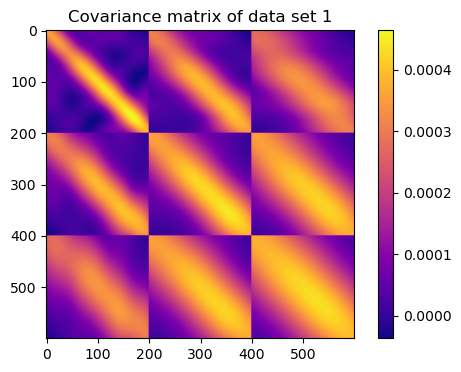

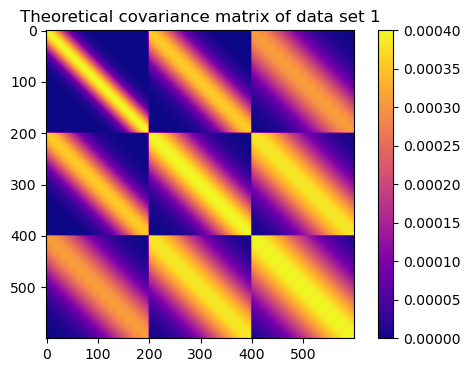

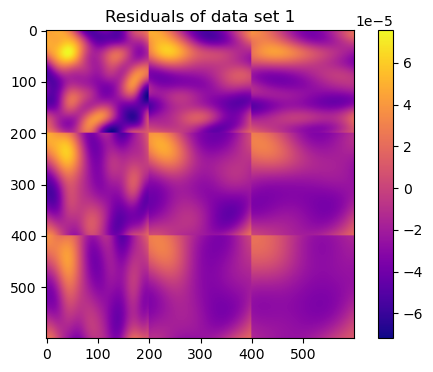

In [19]:
if Plots_3M1:

    # Matrix plot of measured covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Covariance matrix of data set 1')
    plt.imshow(cov_xic1, cmap="plasma")
    cbar = plt.colorbar()


    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Theoretical covariance matrix of data set 1')
    plt.imshow(cov_thcon1, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Residuals of data set 1')
    plt.imshow(cov_thcon1-cov_xic1, cmap="plasma")
    cbar = plt.colorbar()
    plt.show()

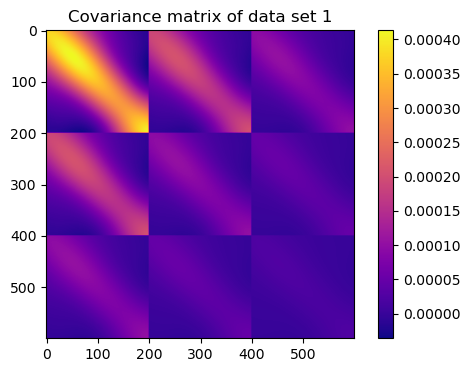

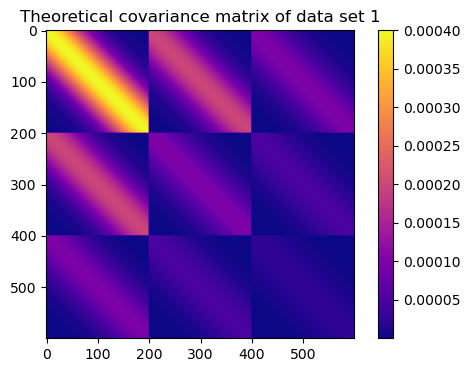

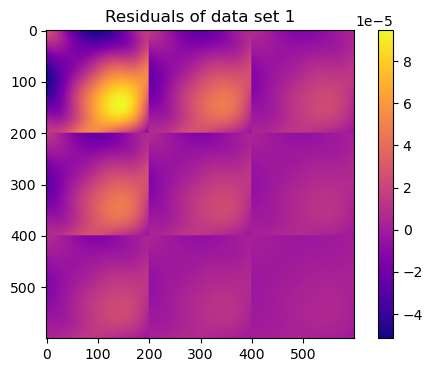

In [20]:
if Plots_3M2:

    # Matrix plot of measured covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Covariance matrix of data set 1')
    plt.imshow(cov_xic2, cmap="plasma")
    cbar = plt.colorbar()


    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Theoretical covariance matrix of data set 1')
    plt.imshow(cov_thcon2, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Residuals of data set 1')
    plt.imshow(cov_thcon2-cov_xic2, cmap="plasma")
    cbar = plt.colorbar()
    plt.show()

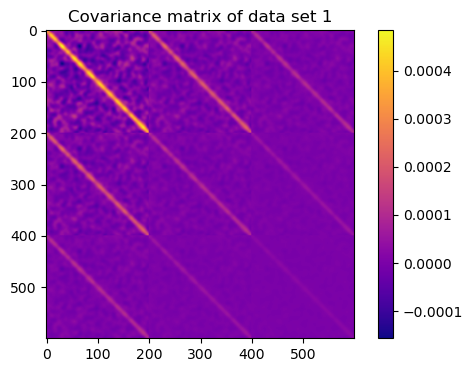

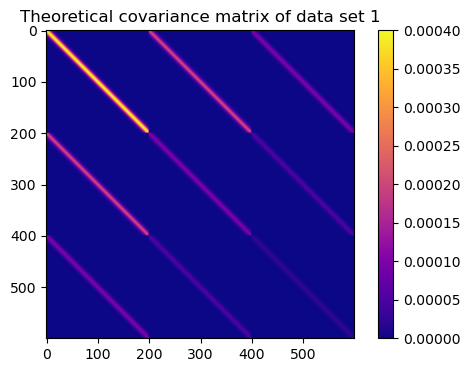

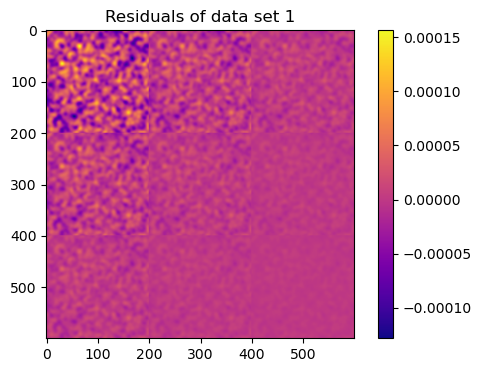

In [21]:
if Plots_3M3:

    # Matrix plot of measured covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Covariance matrix of data set 1')
    plt.imshow(cov_xic3, cmap="plasma")
    cbar = plt.colorbar()


    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Theoretical covariance matrix of data set 1')
    plt.imshow(cov_thcon3, cmap="plasma")
    cbar = plt.colorbar()
    

    # Matrix plot of theoretical covariance matrix of data set 1
    fig = plt.figure(figsize=(6,4))
    plt.title('Residuals of data set 1')
    plt.imshow(cov_thcon3-cov_xic3, cmap="plasma")
    cbar = plt.colorbar()
    plt.show()